In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility import *
from tools import *
from maps import *

In [2]:
# Load the Data's directory.
datadir = 'C:/Users/txu245/Desktop/SstAnalysis/0804_02_01_01/02_01_01.zda'

# Load the Tool Packages.
DataLoader = DataLoader(datadir)
Tools = Tools()
Maps = Maps()

In [3]:
# Parameters Setting.
startPt = 90
numPt = 32
skipPt = 60
basePt = 90
index = np.linspace(0, 550, 80)
threshold = 0.6

# Load and preprocess the Data.
Data = DataLoader.get_data() # Trials * height * width * timepoints.
Data = Tools.Polynomial(startPt=startPt, numPt=skipPt, Data=Data)
Data = Tools.T_filter(Data=Data)
Data = Tools.S_filter(sigma=1, Data=Data)

Data_ave = np.mean(np.copy(Data), axis=0) # height * width * timepoints.
Data_win = Data_ave[:, :, startPt:(startPt+numPt)]
Data_init = Data_ave[:, :, :basePt]

In [4]:
SD = np.zeros((Data.shape[1], Data.shape[2]))
Amp = np.zeros((Data.shape[1], Data.shape[2]))

for i in range(Data_win.shape[0]):
    for j in range(Data_win.shape[1]):
        
        Amp[i][j] = np.max(np.abs(Data_win[i][j]))
        
for i in range(Data_init.shape[0]):
    for j in range(Data_init.shape[1]):
        
        SD[i][j] = np.std(Data_init[i][j])
        
SNR = Amp / SD
SNR = SNR / np.max(SNR)

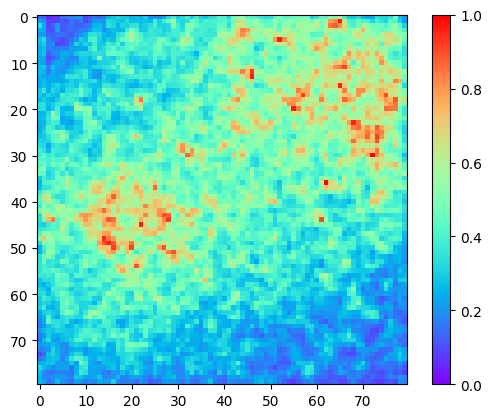

In [5]:
plt.imshow(SNR, vmin=0, vmax=1, cmap='rainbow')
plt.colorbar()
plt.show()

In [6]:
# Horizontal Velocity.
H_Velocity = np.zeros(Data_win.shape[0])

for i in range(Data_win.shape[0]):
    value = 0
    count = 0
    for j in range(Data_win.shape[0]):
        if SNR[Data_win.shape[0]-1-i][j] >= threshold:
            
            value = value + Maps.Half_Amp_Latency(Data_win[Data_win.shape[0]-1-i, j, :])
            count = count + 1
    if count > 0:        
        H_Velocity[i] = value / count

In [7]:
# Vertical Velocity.
V_Velocity = np.zeros(Data_win.shape[1])

for i in range(Data_win.shape[1]):
    value = 0
    count = 0
    for j in range(Data_win.shape[1]):
        if SNR[Data_win.shape[1]-1-j][i] >= threshold:
            
            value = value + Maps.Half_Amp_Latency(Data_win[Data_win.shape[1]-1-j, i, :])
            count = count + 1 
    if count > 0:        
        V_Velocity[i] = value / count

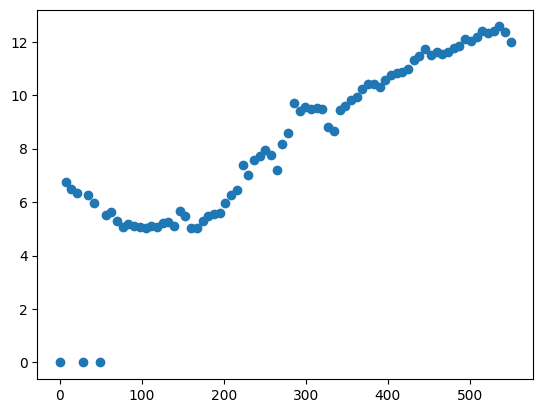

In [8]:
plt.scatter(index, V_Velocity)
plt.show()

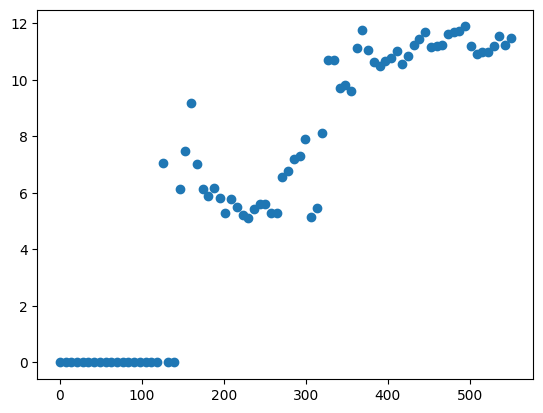

In [9]:
plt.scatter(index, H_Velocity)
plt.show()

In [10]:
V_Velocity_cor = []
tag_V = []

for i in range(80):
    if V_Velocity[i]<=0:
        continue
    else:
        V_Velocity_cor.append(V_Velocity[i])
        tag_V.append(i)

V_Velocity_cor = np.array(V_Velocity_cor)
tag_V = np.array(tag_V)

In [11]:
H_Velocity_cor = []
tag_H = []

for i in range(80):
    if H_Velocity[i]<=0:
        continue
    else:
        H_Velocity_cor.append(H_Velocity[i])
        tag_H.append(i)

H_Velocity_cor = np.array(H_Velocity_cor)
tag_H = np.array(tag_H)

In [12]:
y_coor = tag_H[np.argmin(H_Velocity_cor)]
x_coor = tag_V[np.argmin(V_Velocity_cor)]

print(x_coor)
print(y_coor)

15
33


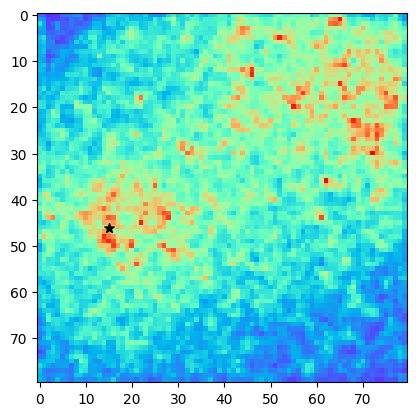

In [13]:
plt.imshow(SNR, vmin=0, vmax=1, cmap='rainbow')
plt.scatter(x_coor, 79-y_coor, marker='*', color='black', s=50)
plt.show()

In [14]:
tag_V_left = []
V_Velocity_left = []
tag_V_right = []
V_Velocity_right = []

for i, element in enumerate(tag_V):
    
    if element <= x_coor:
        tag_V_left.append(element)
        V_Velocity_left.append(V_Velocity_cor[i])
    elif element >=x_coor:
        tag_V_right.append(element)
        V_Velocity_right.append(V_Velocity_cor[i])
        
tag_V_left = np.array(tag_V_left)
V_Velocity_left = np.array(V_Velocity_left)
tag_V_right = np.array(tag_V_right)
V_Velocity_right = np.array(V_Velocity_right)

In [15]:
tag_H_lower = []
H_Velocity_lower = []
tag_H_upper = []
H_Velocity_upper = []

for i, element in enumerate(tag_H):
    
    if element <= y_coor:
        tag_H_lower.append(element)
        H_Velocity_lower.append(H_Velocity_cor[i])
    elif element >=y_coor:
        tag_H_upper.append(element)
        H_Velocity_upper.append(H_Velocity_cor[i])
        
tag_H_lower = np.array(tag_H_lower)
H_Velocity_lower = np.array(H_Velocity_lower)
tag_H_upper = np.array(tag_H_upper)
H_Velocity_upper = np.array(H_Velocity_upper)

In [16]:
V_right_s, V_right_d = np.polyfit(tag_V_right*(550/79), V_Velocity_right, deg=1)
V_right_v = 1 / V_right_s
print(V_right_v, 'μm/ms')

52.32987958883641 μm/ms


In [17]:
H_upper_s, H_upper_d = np.polyfit(tag_H_upper*(550/79), H_Velocity_upper, deg=1)
H_upper_v = 1 / H_upper_s
print(H_upper_v, 'μm/ms')

49.205113156134736 μm/ms


In [18]:
V_left_s, V_left_d = np.polyfit(tag_V_left*(550/79), V_Velocity_left, deg=1)
V_left_v = 1 / V_left_s
print(V_left_v, 'μm/ms')

-53.64711022636955 μm/ms


In [19]:
H_lower_s, H_lower_d = np.polyfit(tag_H_lower*(550/79), H_Velocity_lower, deg=1)
H_lower_v = 1 / H_lower_s
print(H_lower_v, 'μm/ms')

-40.03491992645278 μm/ms


In [20]:
Speed_upper_right = np.sqrt((V_right_v)**2 + (H_upper_v)**2)
print(Speed_upper_right, 'μm/ms')
print(V_right_v, 'μm/ms')
print(H_upper_v, 'μm/ms')

angle_upper_right = np.arctan(H_upper_v / V_right_v) * 180 / np.pi
print(angle_upper_right, '°')

71.83007349634373 μm/ms
52.32987958883641 μm/ms
49.205113156134736 μm/ms
43.23726349744184 °


In [21]:
Speed_lower_left = np.sqrt((V_left_v)**2 + (H_lower_v)**2)
print(Speed_lower_left, 'μm/ms')
print(V_left_v, 'μm/ms')
print(H_lower_v, 'μm/ms')

angle_lower_left = np.arctan(H_lower_v / V_left_v) * 180 / np.pi
print(angle_lower_left, '°')

66.93883214665259 μm/ms
-53.64711022636955 μm/ms
-40.03491992645278 μm/ms
36.732664115301304 °


In [22]:
Speed_upper_left = np.sqrt((V_left_v)**2 + (H_upper_v)**2)
print(Speed_upper_left)
print(V_left_v, 'μm/ms')
print(H_upper_v, 'μm/ms')

angle_upper_left = np.arctan(H_upper_v / V_left_v) * 180 / np.pi
print(angle_upper_left, '°')

72.79529927370494
-53.64711022636955 μm/ms
49.205113156134736 μm/ms
-42.527038152988595 °


In [23]:
Speed_lower_right = np.sqrt((V_right_v)**2 + (H_lower_v)**2)
print(Speed_lower_right, 'μm/ms')
print(V_right_v, 'μm/ms')
print(H_lower_v, 'μm/ms')

angle_lower_right = np.arctan(H_lower_v / V_right_v) * 180 / np.pi
print(angle_lower_right, '°')

65.88786770946228 μm/ms
52.32987958883641 μm/ms
-40.03491992645278 μm/ms
-37.41775814803768 °
